# Customer Churn Prediction: Data Acquisition and Initial Exploration

In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import Essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style

plt.style.use('ggplot')
sns.set(style='whitegrid')

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [6]:
# Load the dataset

data_path = "../data/raw/Telco-Customer-Churn.csv"

try:
    df = pd.read_csv(data_path)
    print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns")
except FileNotFoundError:
    print(f"Dataset not found at {data_path}")
    print("Please download it from: https://www.kaggle.com/datasets/blastchar/telco-customer-churn")
    print("and place it in the data/raw directory")

Dataset loaded successfully with 7043 rows and 21 columns


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Convert all column names to lowercase

df.columns = df.columns.str.lower()

# Check some basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [10]:
# Check some basic statistics
df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
# Check for missing values

df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [13]:
# Explore the target variable (Churn)
print("\nDistribution of the target variable (Churn):")
churn_counts = df['churn'].value_counts()
print(churn_counts)


Distribution of the target variable (Churn):
churn
No     5174
Yes    1869
Name: count, dtype: int64


In [14]:
# Calculate churn rate
churn_rate = (df['churn'] == 'Yes').mean()
print(f"\nChurn Rate: {churn_rate:.2%}")


Churn Rate: 26.54%


### Check for some basic relationships between variables

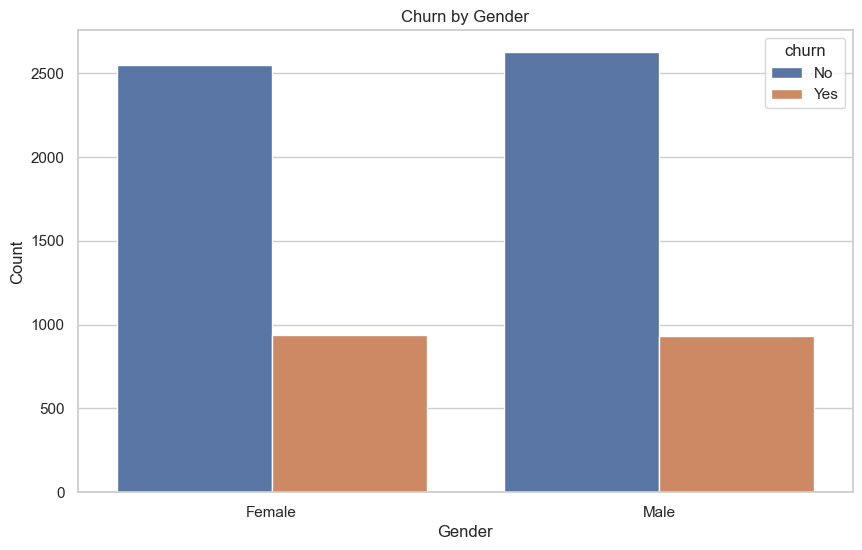

In [18]:
if 'gender' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='gender', hue='churn', data=df)
    plt.title('Churn by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

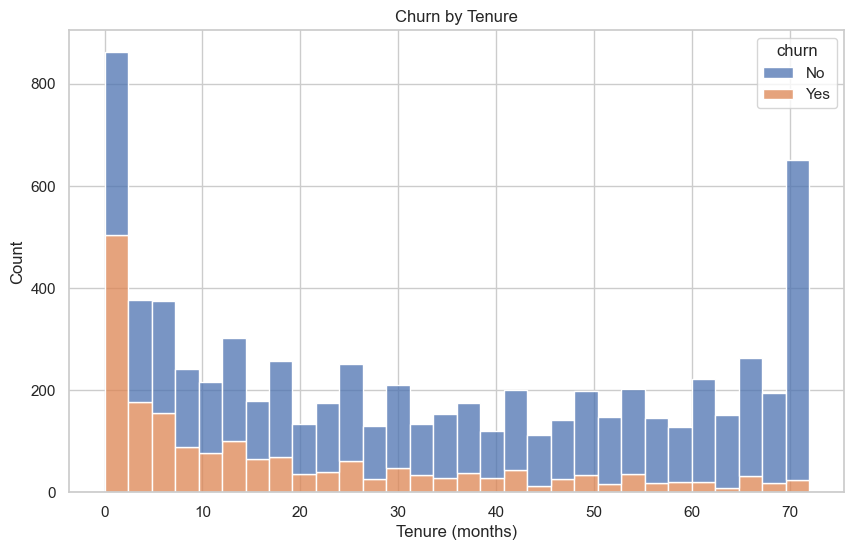

In [20]:
if 'tenure' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='tenure', hue='churn', bins=30, multiple='stack')
    plt.title('Churn by Tenure')
    plt.xlabel('Tenure (months)')
    plt.ylabel('Count')
    plt.show()

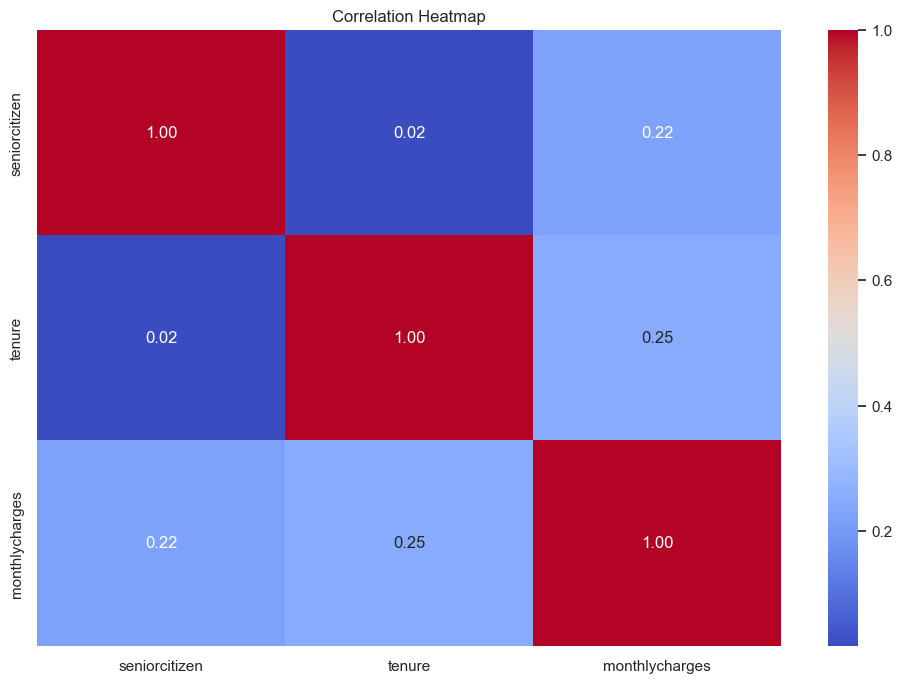

In [22]:
# Check correlations between numeric features
numeric_df = df.select_dtypes(include=['number'])
if not numeric_df.empty:
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

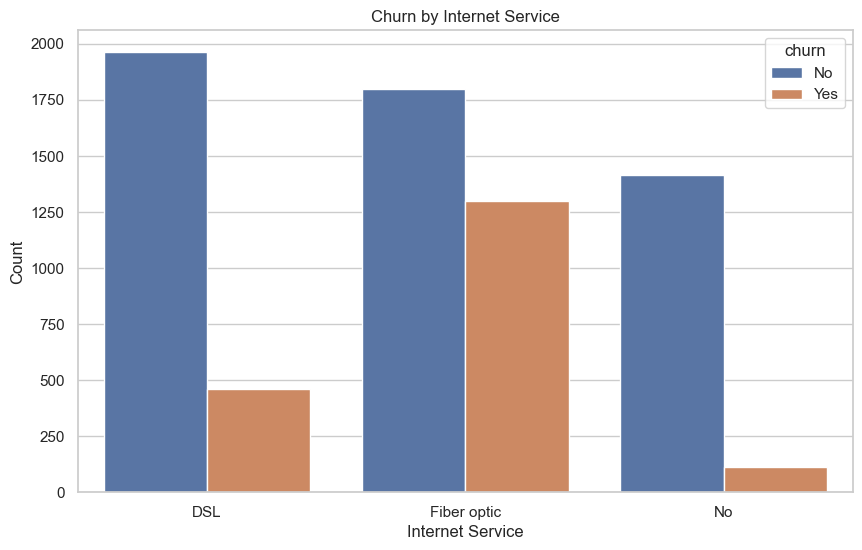

In [27]:
# Check which Internet service has the highest churn rate
if 'internetservice' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='internetservice', hue='churn', data=df)
    plt.title('Churn by Internet Service')
    plt.xlabel('Internet Service')
    plt.ylabel('Count')
    plt.show()

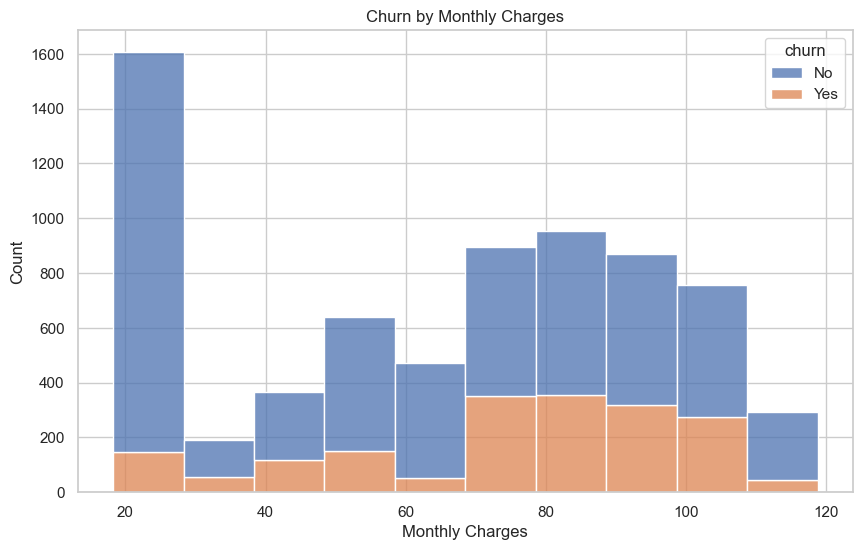

In [ ]:
# Find the distribution of monthly charges per churn
# plot also the normalized distribution of monthly charges per churn

if 'monthlycharges' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='monthlycharges', hue='churn', bins=10, multiple='stack')
    plt.title('Churn by Monthly Charges')
    plt.xlabel('Monthly Charges')
    plt.ylabel('Count')
    plt.show()

In [31]:
# Initial findings and next steps
print("\nInitial Observations:")
print("1. The dataset contains customer information and whether they churned or not")
print("2. Earlier tenure customers are more likely to churn as expected")
print("3. Data preprocessing will be needed for categorical variables")
print("4. Feature engineering opportunities exist (e.g., creating tenure groups)")
print("5. Fiber optic internet service has the highest churn rate, could indicate dissatisfaction")
print("6. Customers with monthly charges between 70-110 are more likely to churn")


Initial Observations:
1. The dataset contains customer information and whether they churned or not
2. Earlier tenure customers are more likely to churn as expected
3. Data preprocessing will be needed for categorical variables
4. Feature engineering opportunities exist (e.g., creating tenure groups)
5. Fiber optic internet service has the highest churn rate, could indicate dissatisfaction
6. Customers with monthly charges between 70-110 are more likely to churn
